In [8]:
import pandas as pd
import numpy as np

In [30]:
data = pd.read_csv('data/data_rms_bearing_1.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


In [31]:
data.describe()

,0,1,2,3,4,5,6,7
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.152867,0.153102,0.151212,0.150680,0.153969,0.150338,0.150380,0.150312
std,0.012501,0.012814,0.013307,0.012899,0.013333,0.013063,0.012918,0.012780
min,0.119746,0.117820,0.116974,0.115786,0.119502,0.116332,0.116370,0.117361
25%,0.149213,0.149268,0.147060,0.146744,0.150438,0.146495,0.146565,0.146482
50%,0.151007,0.151351,0.149639,0.148874,0.152409,0.148438,0.148448,0.148342
75%,0.156103,0.156384,0.154420,0.154026,0.158056,0.153872,0.153553,0.153606
max,0.326161,0.325306,0.377078,0.349152,0.322789,0.347876,0.358188,0.320975


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 8 columns):
0    2156 non-null float64
1    2156 non-null float64
2    2156 non-null float64
3    2156 non-null float64
4    2156 non-null float64
5    2156 non-null float64
6    2156 non-null float64
7    2156 non-null float64
dtypes: float64(8)
memory usage: 134.8 KB


In [33]:
import missingno as msno

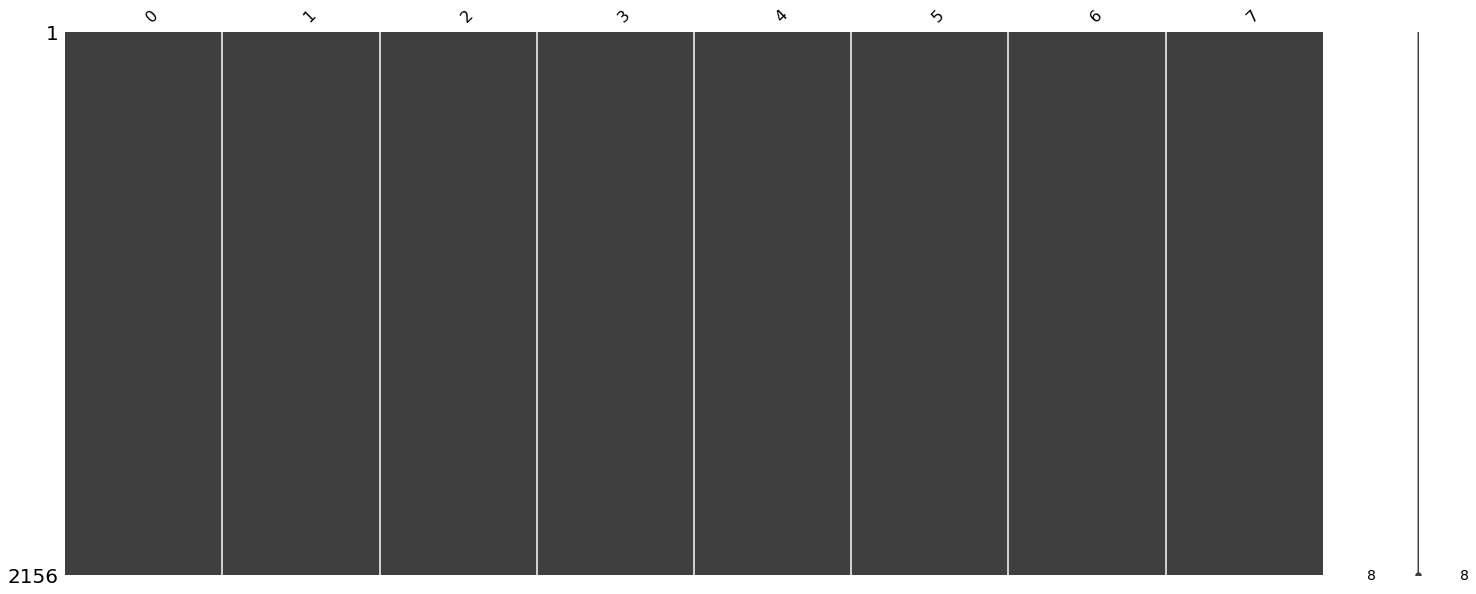

In [34]:
# gives us a quick visual inspection of the data
msno.matrix(data)

In [47]:
# waktu
minutes = []
time = 0
for i in range(2156):
    minutes.append(time)
    if i < 42:
        time += 5
    else:
        time += 10
        
type(minutes)

list

In [48]:
# masukkan ke dalam pandas data
data['times'] = pd.Series(minutes).values
data.head()

,0,1,2,3,4,5,6,7,times
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520,0
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855,5
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333,10
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027,15
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291,20


In [54]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
sns.set_style("white")

[Text(0.5,0,'Time(min)')]

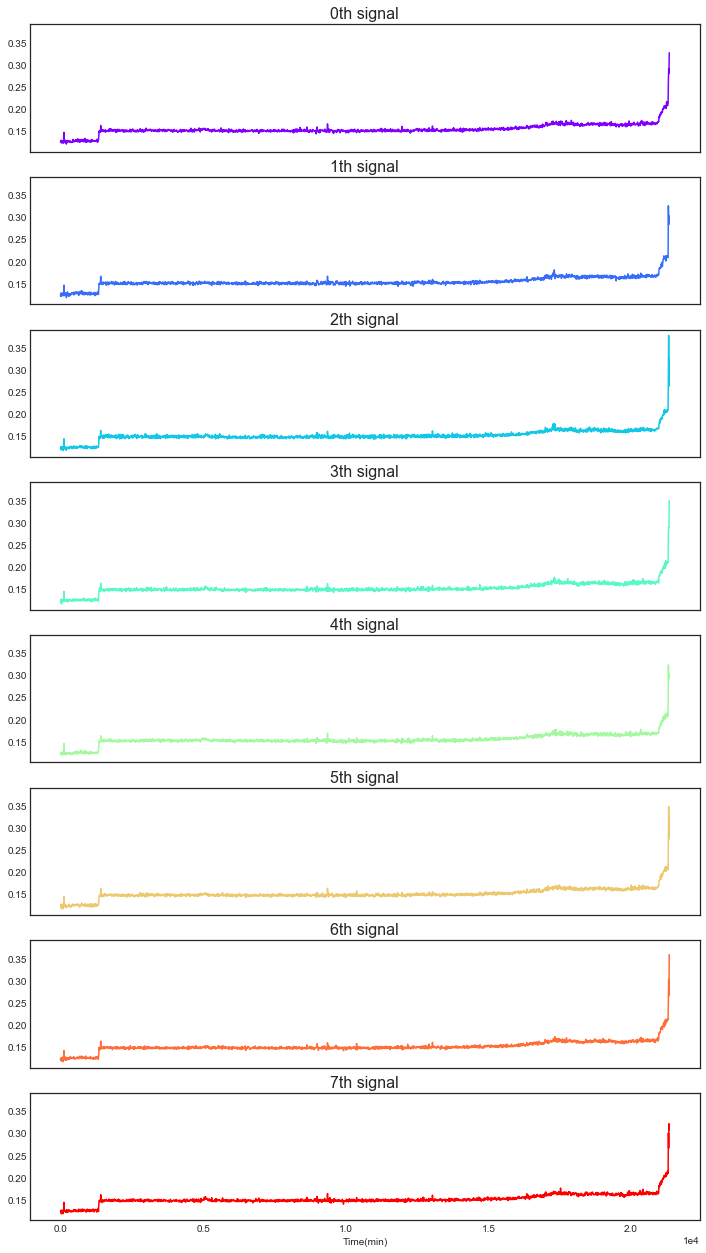

In [60]:
fig, axs = plt.subplots(8, sharex=True,  sharey=True, figsize=(12, 22))
colors = cm.rainbow(np.linspace(0, 1, 8))

for i, (ax, color) in enumerate(zip(axs, colors)):
    mask = data['times'] == i
    ax.plot(data['times'], data[i], c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time(min)')

In [65]:
data.describe()

,0,1,2,3,4,5,6,7,times
count,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000,2156.000000
mean,0.152867,0.153102,0.151212,0.150680,0.153969,0.150338,0.150380,0.150312,10567.094156
std,0.012501,0.012814,0.013307,0.012899,0.013333,0.013063,0.012918,0.012780,6221.721232
min,0.119746,0.117820,0.116974,0.115786,0.119502,0.116332,0.116370,0.117361,0.000000
25%,0.149213,0.149268,0.147060,0.146744,0.150438,0.146495,0.146565,0.146482,5177.500000
50%,0.151007,0.151351,0.149639,0.148874,0.152409,0.148438,0.148448,0.148342,10565.000000
75%,0.156103,0.156384,0.154420,0.154026,0.158056,0.153872,0.153553,0.153606,15952.500000
max,0.326161,0.325306,0.377078,0.349152,0.322789,0.347876,0.358188,0.320975,21340.000000


### tentukan range
- state 1 : <= 0.14
- state 2 : 0.14 - 0.18
- state 3 : >= 0.18

# Proses pada data channel 0

In [90]:
data_ch0 = []
for index, row in data.iterrows():
    if row[0] <= 0.16:
        data_ch0.append(0)
    elif row[0] > 0.16 and row[0] < 0.17:
        data_ch0.append(1)
    elif row[0] >= 0.17:
        data_ch0.append(2)

data_ch0.count(2)

54

In [91]:
states = ["Green", "Orange", "Red"]
n_states = len(states)

observations = [0, 1, 2]
n_observations = len(observations)

# initial probability
phi = np.array([0.6, 0.2, 0.2])

# transition probability
A = np.array([[0.4, 0.3, 0.3],
              [0.3, 0.5, 0.3],
              [0.1, 0.3, 0.6]])

# observation probability
B = np.array([[0.2, 0.3, 0.5],
              [0.5, 0.4, 0.1],
              [0.5, 0.3, 0.2]])

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
true = [0, 1, 0, 0, 1, 2]
pred = [1, 1, 0, 1, 2, 2]

accuracy_score(true, pred)

0.5